In [839]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas import to_datetime
from datetime import datetime, timezone
import datetime
import matplotlib.dates as mdates
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [840]:
# Import the BTC dataset into a Pandas Dataframe
df = pd.read_csv(
    Path("../Desktop/csv/BTCUSD_5_years.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
df

,close
date,
2017-08-22,4092.00
2017-08-23,4143.27
2017-08-24,4312.03
2017-08-25,4360.00
2017-08-26,4326.00
...,...
2022-08-17,23379.04
2022-08-18,22787.49
2022-08-19,21244.91


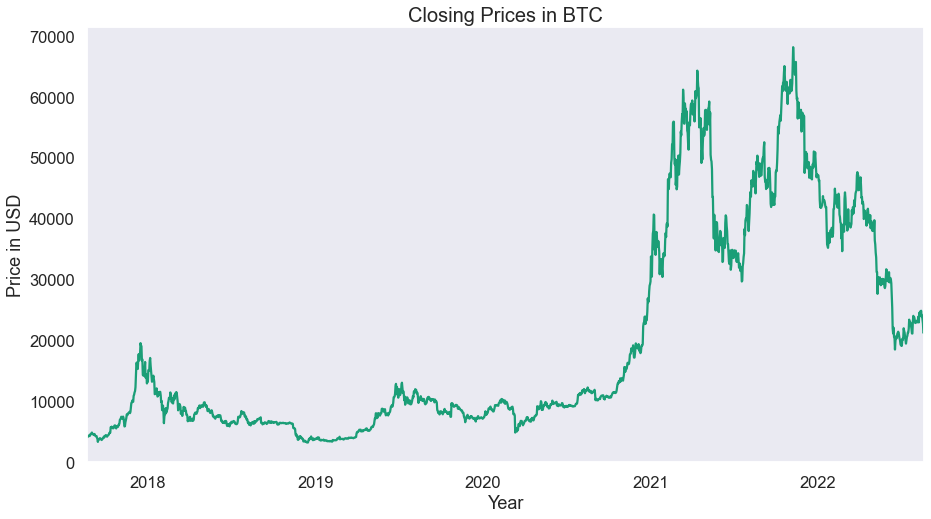

In [841]:
df['close'].plot(figsize = (15, 8))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.title('Closing Prices in BTC', fontsize = 20)
plt.show()

### Plot displaying the Closing Prices of Bitcoin throughout it's lifespan. As shown, it has risen considerably during 2020-2021.

In [842]:
# create 50 days moving average column
df['SLOW_EMA'] = df['close'].rolling(window = 50, min_periods = 1).mean()
# create 200 days simple moving average column
df['FAST_EMA'] = df['close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df.head()

,close,SLOW_EMA,FAST_EMA
date,,,
2017-08-22,4092.00,4092.000000,4092.000000
2017-08-23,4143.27,4117.635000,4117.635000
2017-08-24,4312.03,4182.433333,4182.433333
2017-08-25,4360.00,4226.825000,4226.825000
2017-08-26,4326.00,4246.660000,4246.660000


In [843]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SLOW_EMA'] > df['FAST_EMA'], 1.0, 0.0)

In [844]:
df['Position'] = df['Signal'].diff()

# display first few rows
df.head()

,close,SLOW_EMA,FAST_EMA,Signal,Position
date,,,,,
2017-08-22,4092.00,4092.000000,4092.000000,0.0,NaN
2017-08-23,4143.27,4117.635000,4117.635000,0.0,0.0
2017-08-24,4312.03,4182.433333,4182.433333,0.0,0.0
2017-08-25,4360.00,4226.825000,4226.825000,0.0,0.0
2017-08-26,4326.00,4246.660000,4246.660000,0.0,0.0


### Slow and fast EMA's were created in order to provide a Signals column which will be used to determine if the BTC at the given stage should be purchased or sold.  

In [845]:
df['BULL'] = np.where(df['SLOW_EMA'] > df["FAST_EMA"], df['close'], np.NaN)
df['BEAR'] = np.where(df['SLOW_EMA'] < df["FAST_EMA"], df['close'], np.NaN)

df

,close,SLOW_EMA,FAST_EMA,Signal,Position,BULL,BEAR
date,,,,,,,
2017-08-22,4092.00,4092.000000,4092.000000,0.0,NaN,NaN,NaN
2017-08-23,4143.27,4117.635000,4117.635000,0.0,0.0,NaN,NaN
2017-08-24,4312.03,4182.433333,4182.433333,0.0,0.0,NaN,NaN
2017-08-25,4360.00,4226.825000,4226.825000,0.0,0.0,NaN,NaN
2017-08-26,4326.00,4246.660000,4246.660000,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2022-08-17,23379.04,22144.706600,32655.083950,0.0,0.0,NaN,23379.04
2022-08-18,22787.49,22199.937200,32583.889150,0.0,0.0,NaN,22787.49
2022-08-19,21244.91,22237.392800,32497.728600,0.0,0.0,NaN,21244.91


### Bull and Bear columns were then created to describe if the current position of the closing prices of Bitcoin is in a Bull or Bear Market, which can help individual's determine whether or not shares are purchased or not.

In [846]:
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [847]:
df_2 = df.drop(columns = ["Signal", "BEAR"])

In [848]:
# Calculating the short-window EMA
short_rolling = df_2.rolling(window=20).mean()
short_rolling.head(20)

,close,SLOW_EMA,FAST_EMA,Position,BULL
date,,,,,
2017-08-22,NaN,NaN,NaN,NaN,NaN
2017-08-23,NaN,NaN,NaN,NaN,NaN
2017-08-24,NaN,NaN,NaN,NaN,NaN
2017-08-25,NaN,NaN,NaN,NaN,NaN
2017-08-26,NaN,NaN,NaN,NaN,NaN
2017-08-27,NaN,NaN,NaN,NaN,NaN
2017-08-28,NaN,NaN,NaN,NaN,NaN
2017-08-29,NaN,NaN,NaN,NaN,NaN
2017-08-30,NaN,NaN,NaN,NaN,NaN


In [849]:
# Calculating the long-window EMA
long_rolling = df_2.rolling(window=100).mean()
long_rolling.tail()

,close,SLOW_EMA,FAST_EMA,Position,BULL
date,,,,,
2022-08-17,24471.6449,28493.850202,38489.223494,0.0,NaN
2022-08-18,24387.4318,28305.132610,38355.235202,0.0,NaN
2022-08-19,24323.5020,28119.654774,38222.053410,0.0,NaN
2022-08-20,24231.6846,27937.093504,38089.594368,0.0,NaN
2022-08-21,24153.4163,27757.945742,37958.015870,0.0,NaN


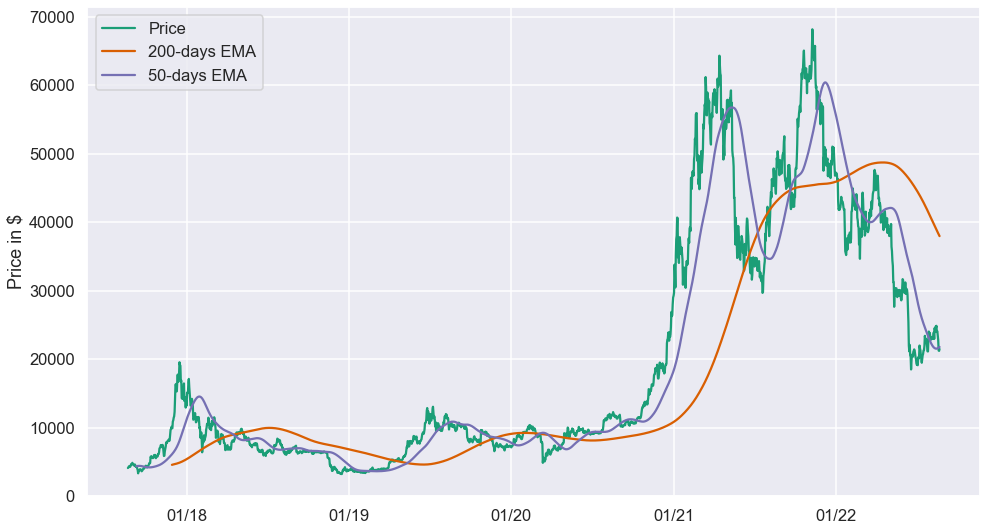

In [850]:
start_date = '2017-08-22'
end_date = '2022-08-21'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_2.loc[start_date:end_date, :].index, df_2.loc[start_date:end_date, 'close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'FAST_EMA'], label = '200-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'SLOW_EMA'], label = '50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### A plot of the remaining columns was designed, to help visualise how the slow and fast EMA correlate to the real price of Bitcoin. 

# Using Machine Learning to Predict

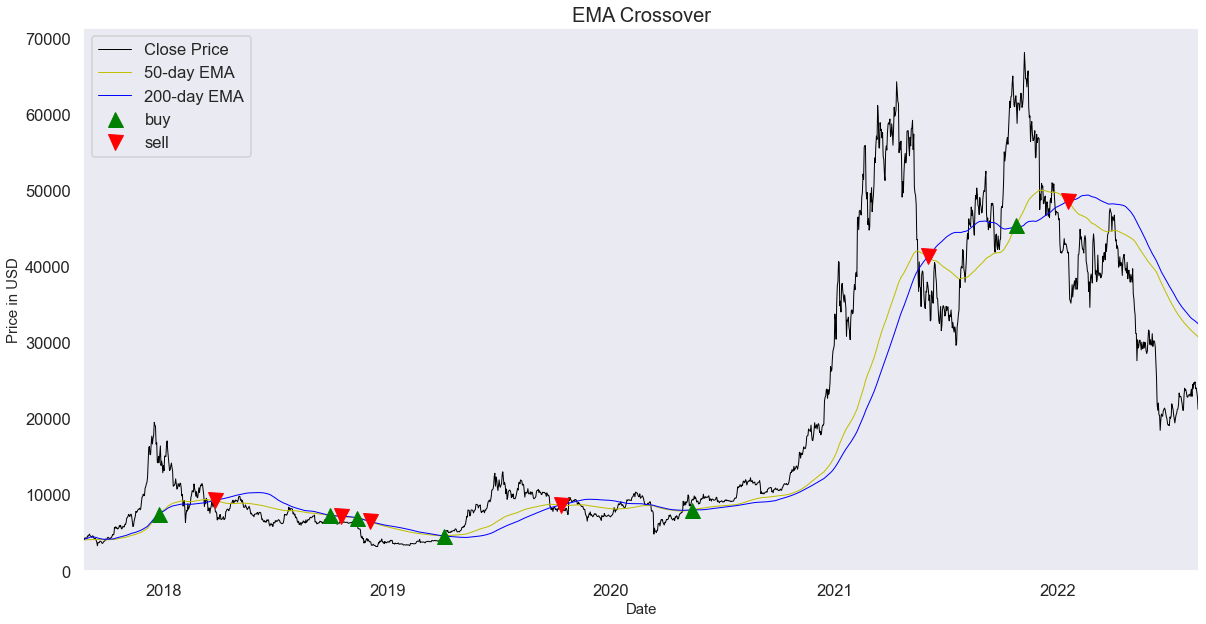

In [851]:
# extract the daily closing price data

# Create 20 days exponential moving average column
df['SLOW_EMA'] = df['close'].ewm(span = 50, adjust = False).mean()

# Create 50 days exponential moving average column
df['SLOW_EMA'] = df['close'].ewm(span = 200, adjust = False).mean()

# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
df['Signal'] = 0.0  
df['Signal'] = np.where(df['SLOW_EMA'] > df['FAST_EMA'], 1.0, 0.0)

# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
df['Position'] = df['Signal'].diff()
plt.figure(figsize = (20,10))

# plot close price, short-term and long-term moving averages 
df['close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['SLOW_EMA'].plot(color = 'y', lw = 1, label = '50-day EMA') 
df['FAST_EMA'].plot(color = 'b', lw = 1, label = '200-day EMA')

# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['SLOW_EMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['FAST_EMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

# Plot
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

### An EMA Crossover plot was then created in order to add buy or sell indicators.

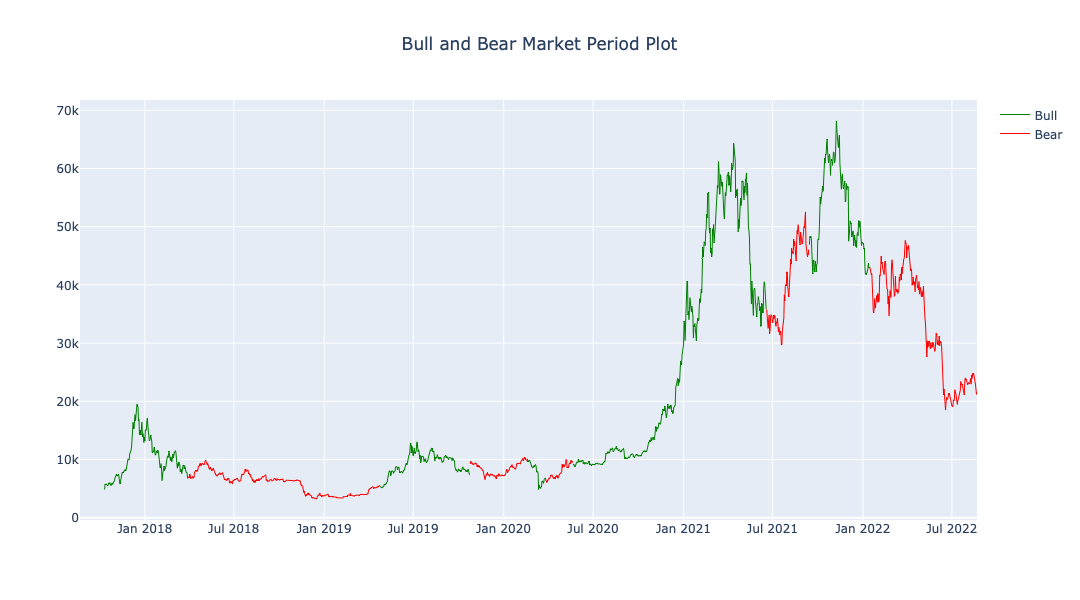

In [852]:
# Primary Markets
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Line(x = df.index, y = df['BULL'], line=dict(color="green", width=1), name="Bull"), row = 1, col = 1)
fig.add_trace(go.Line(x = df.index, y = df['BEAR'], line=dict(color="red", width=1), name="Bear"), row = 1, col = 1)

fig.update_layout(
        title={'text':'Bull and Bear Market Period Plot', 'x':0.5},
        autosize=False,
        width=1000,height=600)
fig.update_yaxes(range=[0,1000000000],secondary_y=True)

fig.show()

### A final plot was created to present the Bull and Bear Market periods across the duration of Bitcoin's history.

In [853]:
df = df[(df['Position'] == 1) | (df['Position'] == -1)]
df['Position'] = df['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df,tablefmt = 'psql', headers = 'keys'))

+---------------------+----------+------------+------------+----------+------------+----------+----------+
| date                |    close |   SLOW_EMA |   FAST_EMA |   Signal | Position   |     BULL |     BEAR |
|---------------------+----------+------------+------------+----------+------------+----------+----------|
| 2017-12-23 00:00:00 | 15075.9  |    7449.97 |    7443.07 |        1 | Buy        | 15075.9  |   nan    |
| 2018-03-25 00:00:00 |  8438.92 |    9267.5  |    9289.68 |        0 | Sell       |  8438.92 |   nan    |
| 2018-09-29 00:00:00 |  6546.95 |    7340.99 |    7338.85 |        1 | Buy        |   nan    |  6546.95 |
| 2018-10-17 00:00:00 |  6455.43 |    7191.73 |    7194.43 |        0 | Sell       |   nan    |  6455.43 |
| 2018-11-12 00:00:00 |  6302.97 |    7005.72 |    7002.36 |        1 | Buy        |   nan    |  6302.97 |
| 2018-12-04 00:00:00 |  3848.29 |    6507.27 |    6511.81 |        0 | Sell       |   nan    |  3848.29 |
| 2019-04-03 00:00:00 |  4975.97 |   

# Prophet Model - Predictions and Forecasting

In [854]:
# Import the BTC dataset into a Pandas Dataframe
df_2 = pd.read_csv(
    Path("../Desktop/csv/BTCUSD_5_years.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
df_2

,close
date,
2017-08-22,4092.00
2017-08-23,4143.27
2017-08-24,4312.03
2017-08-25,4360.00
2017-08-26,4326.00
...,...
2022-08-17,23379.04
2022-08-18,22787.49
2022-08-19,21244.91


In [855]:
df_2 = df_2.reset_index()

In [856]:
df_2 = df_2[["date","close"]] # select Date and Price
# Rename the features
df_2 = df_2.rename(columns = {"date":"ds","close":"y"}) #renaming the columns of the dataset
df_2

,ds,y
0,2017-08-22,4092.00
1,2017-08-23,4143.27
2,2017-08-24,4312.03
3,2017-08-25,4360.00
4,2017-08-26,4326.00
...,...,...
1821,2022-08-17,23379.04
1822,2022-08-18,22787.49
1823,2022-08-19,21244.91
1824,2022-08-20,21200.14


In [857]:
m = Prophet(daily_seasonality = True)
m.fit(df_2) # fit the model 

20:50:51 - cmdstanpy - INFO - Chain [1] start processing
20:50:52 - cmdstanpy - INFO - Chain [1] done processing


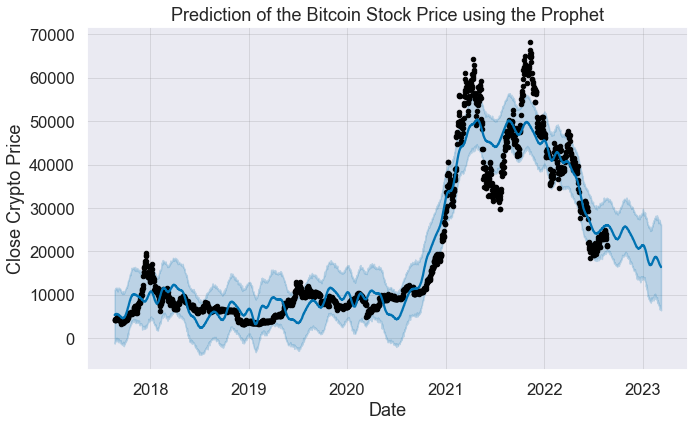

In [858]:
future = m.make_future_dataframe(periods=200) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Crypto Price")
plt.show()

### A Prophet Model was made in order to forecast the future closing prices of Bitcoin. The predictions show that Bitcoin will lose it's value overtime (potentially), as seen by the plot.

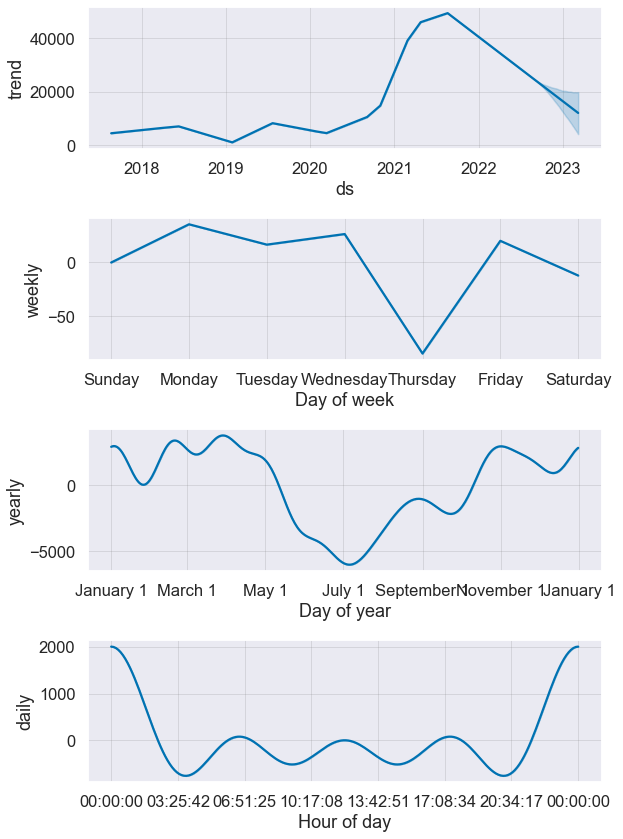

In [859]:
m.plot_components(prediction)
plt.show()

### Mutliple Plot's of each component in the dataframe.